In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [2]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [3]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [4]:
data = pd.DataFrame(housing.data, columns = housing.feature_names)
dataset = pd.DataFrame(np.c_[data['MedInc'], data['HouseAge'], data['Population']], columns = ['MedInc', 'HouseAge', 'Population'])

In [5]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
dataset

,MedInc,HouseAge,Population
0,8.3252,41.0,322.0
1,8.3014,21.0,2401.0
2,7.2574,52.0,496.0
3,5.6431,52.0,558.0
4,3.8462,52.0,565.0
...,...,...,...
20635,1.5603,25.0,845.0
20636,2.5568,18.0,356.0
20637,1.7000,17.0,1007.0
20638,1.8672,18.0,741.0


In [7]:
#training dataset
X = dataset[:-100]
Y = housing.target[:-100]
#testing dataset
X_test = dataset[-100:]
Y_test = housing.target[-100:]


In [8]:
u = np.mean(dataset, axis = 0)
std = np.std(dataset, axis = 0)

In [9]:
#trainig ko normalize
X = (X - u)/std
#testing ko normalize
X_test = (X_test - u)/std

In [10]:
#convert it into numpy array
X = np.array(X)
Y = np.array(Y)

In [11]:
X[:5,:]

array([[ 2.34476576,  0.98214266, -0.9744286 ],
       [ 2.33223796, -0.60701891,  0.86143887],
       [ 1.7826994 ,  1.85618152, -0.82077735],
       [ 0.93296751,  1.85618152, -0.76602806],
       [-0.012881  ,  1.85618152, -0.75984669]])

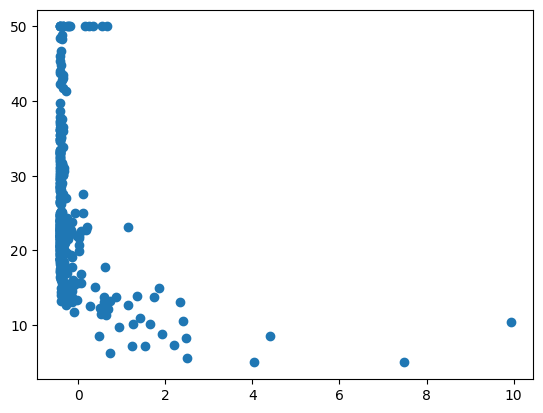

In [189]:
plt.scatter(X[:,1], Y)
plt.show()

# SINCE X[0] = 1 SO WE NEED TO STACK A COLUMN OF 1 IN X DATASET

In [13]:
one = np.ones((X.shape[0], 1))

In [14]:
X = np.hstack((one, X))

In [192]:
X

array([[ 1.        , -0.41978194,  0.28482986, ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [ 1.        , -0.41733926, -0.48772236, ..., -0.30309415,
         0.44105193, -0.49243937],
       [ 1.        , -0.41734159, -0.48772236, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [ 1.        ,  2.46573659, -0.48772236, ...,  0.80657583,
         0.44105193,  0.99760795],
       [ 1.        ,  4.41236983, -0.48772236, ...,  0.80657583,
        -0.2983844 ,  2.06433044],
       [ 1.        ,  7.48364564, -0.48772236, ...,  0.80657583,
         0.31024714,  1.4475658 ]])

In [193]:
print(X[:5, :])
print(X.shape)

[[ 1.         -0.41978194  0.28482986 -1.2879095  -0.27259857 -0.14421743
   0.41367189 -0.12001342  0.1402136  -0.98284286 -0.66660821 -1.45900038
   0.44105193 -1.0755623 ]
 [ 1.         -0.41733926 -0.48772236 -0.59338101 -0.27259857 -0.74026221
   0.19427445  0.36716642  0.55715988 -0.8678825  -0.98732948 -0.30309415
   0.44105193 -0.49243937]
 [ 1.         -0.41734159 -0.48772236 -0.59338101 -0.27259857 -0.74026221
   1.28271368 -0.26581176  0.55715988 -0.8678825  -0.98732948 -0.30309415
   0.39642699 -1.2087274 ]
 [ 1.         -0.41675042 -0.48772236 -1.30687771 -0.27259857 -0.83528384
   1.01630251 -0.80988851  1.07773662 -0.75292215 -1.10611514  0.1130321
   0.41616284 -1.36151682]
 [ 1.         -0.41248185 -0.48772236 -1.30687771 -0.27259857 -0.83528384
   1.22857665 -0.51117971  1.07773662 -0.75292215 -1.10611514  0.1130321
   0.44105193 -1.02650148]]
(406, 14)


In [194]:
#X[0].shape = first row or iski shape btari hai usme kitne columns hai (4,0) toh mtlb 4 columns hai isliye n = X.shape[0] lete hai
print(X[0].shape)

(14,)


# NOW APPLY LINEAR REGRESSION 

In [382]:
def hypothesis(X,theta):
    y_ = 0
    n = X.shape[0]
    for i in range(n):
        y_ = theta[i]*X[i]
    return y_    

In [383]:
def cost(X,theta):
    m = X.shape[0]         #no of rows and there is only one element in it only
    
    total_loss = 0
    for i in range(m):
        y_p = hypothesis(X[i],theta)   #X[i] is a row contianing only one element
        
        y_gt = Y[i]
        
        total_loss += (y_p - y_gt)**2
        
    return total_loss/m   

In [384]:
def gradient(X,Y,theta):
    m,n = X.shape
    
    grad = np.zeros((n,))
    
    for j in range(n):
        for i in range(m):
            y_p = hypothesis(X[i], theta)
            y_gt = Y[i]
            
            grad[j] += (y_p - y_gt)*X[i][j]
    return grad/m
        
        

In [385]:
def gradient_descent(X,Y, learning_rate = 0.003, epochs = 100):
    m, n = X.shape
    theta = np.zeros((n,))
    cost_epoch = []
    for i in range(epochs):
        loss = cost(X,theta)
        grad = gradient(X,Y,theta)
        cost_epoch.append(loss)
        
        for j in range(n):
             theta[j] = theta[j] - learning_rate*grad[j]
                
        return theta , cost_epoch       

In [386]:
theta , cost_epoch = gradient_descent(X, Y, learning_rate = 0.1, epochs = 1000)

In [387]:
array([ 2.07340982e-03,  8.00173806e-04,  1.24176944e-04, -2.86705535e-05])


NameError: name 'array' is not defined

In [388]:
theta

array([ 2.40899015, -0.65517073,  0.60748901, -0.91017706,  0.30953634,
       -0.76414416,  0.87918816, -0.62990211,  0.55196199, -0.91539804,
       -1.02852959, -0.89342741,  0.67081485, -1.05465239])

In [389]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [390]:
cost_epoch

[666.9598768472904]

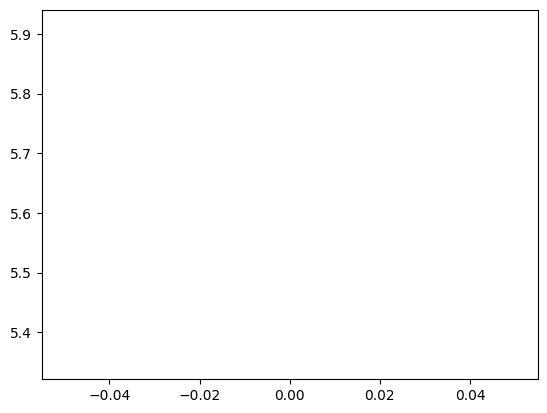

In [26]:
plt.plot(cost_epoch, color = 'green')

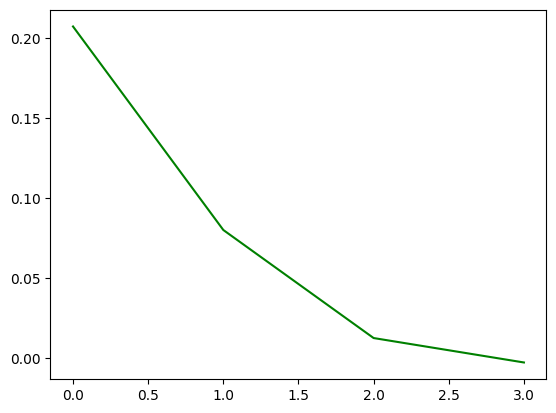

In [27]:
plt.plot(theta, color = 'green')

In [28]:
def R2_score(y_t, y_p):
    num = np.sum((y_t - y_p)**2)
    den = np.sum((y_t - y_t.mean())**2)
    score = (1-num/den)
    return score

In [29]:
X_test.shape

(100, 3)

In [30]:
one = np.ones((X_test.shape[0], 1))

In [31]:
X_test = np.hstack((one, X_test))

In [32]:
print(X_test[:4,:])


[[ 1.         -0.35786909 -1.00430931 -0.03486006]
 [ 1.          0.39574619 -1.24268354  1.23850256]
 [ 1.          0.45275292  0.34647803 -0.39426269]
 [ 1.         -1.12622296  0.34647803  2.02353679]]


In [33]:
y_pred_test = []
for i in range(X_test.shape[0]):
    pred = hypothesis(X_test[i], theta)
    y_pred_test.append(pred)
y_pred_test = np.array(y_pred_test)    

In [34]:
for i in range(len(y_pred_test)):
    print(y_pred_test[i], Y_test[i])

9.994572933244744e-05 1.943
-0.003550855385829694 2.265
0.0011303729511569908 2.362
-0.005801591995662664 1.826
-0.01241708666550918 2.194
-0.001958376952100854 2.277
0.0016468524431771548 1.231
-0.0009988390723182942 1.079
0.001834202847145254 0.694
-0.0017533042126222594 1.222
0.0009227684494626109 1.031
-0.0003886843783140805 0.958
-0.0010671966521444923 1.206
-0.002024202769711267 0.953
-0.00059122535557689 0.978
-0.0006950276064240799 1.72
-0.0011406177564022607 1.525
-0.0010874507498707733 1.194
0.0008923873028731895 1.544
0.0011253094267254205 1.672
0.0007657991920839337 1.469
-0.0003101997496247418 1.089
2.652462507467899e-05 1.072
-0.013700690108912235 1.325
0.002216498941728807 1.514
0.0015633042900562461 2.25
-0.0003253903229194525 2.007
-0.004138224219891842 1.65
-0.0012191023850915994 1.399
-0.003647062350029528 1.334
0.0013455727394987259 1.396
-0.0028748748742150674 1.273
-0.0003988114271772209 1.267
0.0024519528277968227 2.25
0.0013354456906355854 1.938
0.00295324174652

In [35]:
R2_score(Y_test, y_pred_test)

-4.4003449798270085

In [36]:
from sklearn import metrics

In [97]:
print('MAE distance', metrics.mean_absolute_error(Y_test, y_pred_test))
print('MSE distance', metrics.mean_squared_error(Y_test, y_pred_test))
print('RMSE distance', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_test)))


MAE distance 1.0704550969897166
MSE distance 1.4068534996652287
RMSE distance 1.1861085530697553


# VECTORIZATION 

In [110]:
def hypothesis(X, theta):
    return np.dot(X,theta)


In [111]:
def cost(X, Y, theta):
    m = X.shape[0]
    
    
    total_loss = 0
    y_p = hypothesis(X[i], theta)
     
    total_loss = np.sum((y_p - Y)**2)
    return total_loss/m

In [124]:
def gradient(X, Y, theta):
    m = X.sha[0]
    y_p = hypothesis(X,theta)
    grad = np.dot(X.T,(y_p - Y))
    return grad/m
    

In [125]:
def gradient_descent(X, Y, A=0.001, epochs = 1000):
    m,n = X.shape
    
    theta = np.zeros((n,))
    cost_epoch = []
    
    for i in range(epochs):
        
        loss = cost(X,Y, theta)
        grad = gradient(X,Y, theta)
        cost_epoch.append(loss)
        
        theta = theta - A*grad
        
        return theta , cost_epoch

In [126]:
theta, cost_epoch = gradient_descent(X,Y, A = 0.001, epochs = 1000)

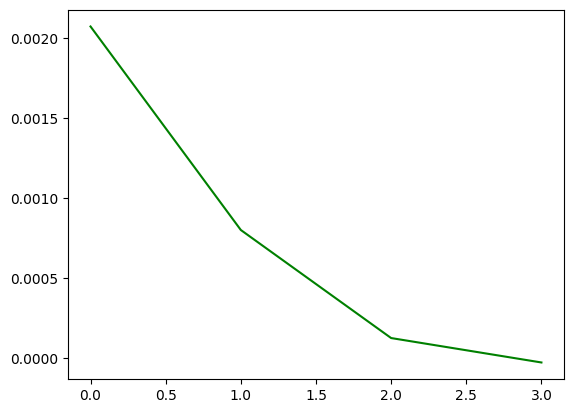

In [127]:
plt.plot(theta, color = 'green')

In [128]:
theta

array([ 2.07340982e-03,  8.00173806e-04,  1.24176944e-04, -2.86705535e-05])

In [129]:
cost_epoch

[5.630931285204328]

In [130]:
y_pred_test = []
for i in range(X_test.shape[0]):
    pred = hypothesis(X_test[i], theta)
    y_pred_test.append(pred)
y_pred_test = np.array(y_pred_test)    

In [131]:
for i in range(len(y_pred_test)):
    print(y_pred_test[i], Y_test[i])

0.0016633397390118942 1.943
0.0022002543539103928 2.265
0.0024900191566512905 2.362
0.001157244367508494 1.826
0.001133057427868097 2.194
0.0019749349866452917 2.277
0.00209633999348909 1.231
0.0014983635835236347 1.079
0.0011410364205557883 0.694
0.0018004351940519852 1.222
0.0016124245931221318 1.031
0.0015902154447490942 0.958
0.0017043892740131817 1.206
0.0015592947132197642 0.953
0.0013728367950529958 0.978
0.0016046657591818297 1.72
0.0011386048518519695 1.525
0.0015623834363530224 1.194
0.0021856447478031784 1.544
0.0024567456703516095 1.672
0.0022513176501084446 1.469
0.0015319006206727164 1.089
0.0017989258612949824 1.072
0.001428550796888982 1.325
0.0017149217992282948 1.514
0.0014111283469870521 2.25
0.0022750559150110468 2.007
0.0025021688504204263 1.65
0.002357187076647553 1.399
0.0020606789773015923 1.334
0.0015903528818076674 1.396
0.0016308708743947656 1.273
0.0016018217794624362 1.267
0.002774341749751995 2.25
0.0010865896096307701 1.938
0.0021444752404077847 1.875
0.0

In [132]:
print('MAE distance', metrics.mean_absolute_error(Y_test, y_pred_test))
print('MSE distance', metrics.mean_squared_error(Y_test, y_pred_test))
print('RMSE distance', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_test)))


MAE distance 1.0704550969897166
MSE distance 1.4068534996652287
RMSE distance 1.1861085530697553


In [399]:
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [400]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [401]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [402]:
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [403]:
len(data)

506

In [404]:
v= pd.DataFrame(data)

In [405]:
v

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [406]:
len(v)

506

In [407]:
len(target)

506

In [408]:
dataset = pd.DataFrame(np.c_[v[3], v[0], v[4], v[2]], columns = ['CHAS','CRIM','NOX','INDUS'])

In [409]:
dataset

,CHAS,CRIM,NOX,INDUS
0,0.0,0.00632,0.538,2.31
1,0.0,0.02731,0.469,7.07
2,0.0,0.02729,0.469,7.07
3,0.0,0.03237,0.458,2.18
4,0.0,0.06905,0.458,2.18
...,...,...,...,...
501,0.0,0.06263,0.573,11.93
502,0.0,0.04527,0.573,11.93
503,0.0,0.06076,0.573,11.93
504,0.0,0.10959,0.573,11.93


In [410]:
print(dataset.shape, target.shape)


(506, 4) (506,)


In [411]:
X_train = dataset[:-100]
Y_train = target[:-100]
X_test = dataset[-100:]
Y_test = target[-100:]

In [412]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(406, 4) (406,) (100, 4) (100,)


# normalization

In [413]:
u = np.mean(dataset, axis = 0)
std = np.std(dataset, axis = 0)
print(u.shape , std.shape)

(4,) (4,)


In [414]:
X_train = (X_train - u)/std
X_test = (X_test - u)/std
X_train = np.array(X_train)
X_test = np.array(X_test)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(406, 4) (100, 4) (406,) (100,)


In [415]:
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [416]:
pd.DataFrame(X_train).head()

,0,1,2,3
0,-0.272599,-0.419782,-0.144217,-1.287909
1,-0.272599,-0.417339,-0.740262,-0.593381
2,-0.272599,-0.417342,-0.740262,-0.593381
3,-0.272599,-0.416750,-0.835284,-1.306878
4,-0.272599,-0.412482,-0.835284,-1.306878


C:\Users\YASHASVI\AppData\Local\Temp\ipykernel_11896\1848770221.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


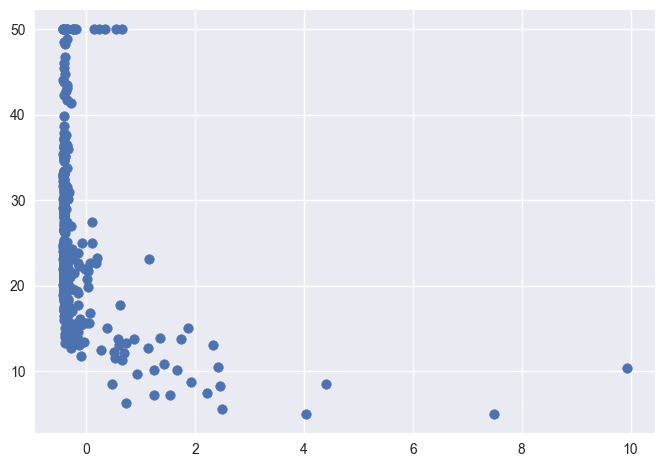

In [417]:
plt.style.use('seaborn')
plt.scatter(X_train[:,1], Y_train)


In [418]:
one = np.ones((X_train.shape[0], 1))

In [419]:
X_train = np.hstack((one, X_train))

In [420]:
X_train[:5,]

array([[ 1.        , -0.27259857, -0.41978194, -0.14421743, -1.2879095 ],
       [ 1.        , -0.27259857, -0.41733926, -0.74026221, -0.59338101],
       [ 1.        , -0.27259857, -0.41734159, -0.74026221, -0.59338101],
       [ 1.        , -0.27259857, -0.41675042, -0.83528384, -1.30687771],
       [ 1.        , -0.27259857, -0.41248185, -0.83528384, -1.30687771]])

# now apply linear regression on this dataset we obtain

In [421]:
def hypothesis(X,theta):
    y_ = 0
    n = X.shape[0]
    for i in range(n):
        y_ = theta[i]*X[i]
    return y_    

In [422]:
def cost(X,theta):
    m = X.shape[0]         #no of rows and there is only one element in it only
    
    total_loss = 0
    for i in range(m):
        y_p = hypothesis(X[i],theta)   #X[i] is a row contianing only one element
        
        y_gt = Y[i]
        
        total_loss += (y_p - y_gt)**2
        
    return total_loss/m   

In [423]:
def gradient(X,Y,theta):
    m,n = X.shape
    
    grad = np.zeros((n,))
    
    for j in range(n):
        for i in range(m):
            y_p = hypothesis(X[i], theta)
            y_gt = Y[i]
            
            grad[j] += (y_p - y_gt)*X[i][j]
    return grad/m
        
        

In [428]:
def gradient_descent(X,Y, learning_rate = 0.003, epochs = 100):
    m, n = X.shape
    theta = np.zeros((n,))
    cost_epoch = []
    for i in range(epochs):
        loss = cost(X,theta)
        grad = gradient(X,Y,theta)
        cost_epoch.append(loss)
        
        for j in range(n):
             theta[j] = theta[j] - learning_rate*grad[j]
                
        return theta , cost_epoch       

In [429]:
print(X_train.shape, Y_train.shape)

(406, 5) (406,)


In [430]:
theta , cost_epoch = gradient_descent(X, Y, learning_rate = 0.1, epochs = 1000)

In [431]:
theta

array([ 2.40899015, -0.65517073,  0.60748901, -0.91017706,  0.30953634,
       -0.76414416,  0.87918816, -0.62990211,  0.55196199, -0.91539804,
       -1.02852959, -0.89342741,  0.67081485, -1.05465239])

In [435]:
cost_epoch

[666.9598768472904]